In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Suppress specific warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)  # ignore warnings for specific matplotlib commands which will be outdated soon


In [9]:
def convert_to_code_path(windows_path):
    """
    Converts a Windows file path with single backslashes to a format with double backslashes for use in Python code.

    Parameters:
    - windows_path: str
        The original Windows file path (e.g., 'C:\\Users\\YourName\\Folder').

    Returns:
    - str
        The modified path with double backslashes, suitable for Python (e.g., 'C:\\\\Users\\\\YourName\\\\Folder').
    """
    # Replace each single backslash with a double backslash
    return windows_path.replace("\\", "\\\\")

In [27]:
## minimum 3 frames
min3 = convert_to_code_path(r'E:\Spandan\2D_Neurons_Paper\Ridges\minimum_3_frames')

## minimum 5 frames
min5 = convert_to_code_path(r'E:\Spandan\2D_Neurons_Paper\Ridges\minimum_5_frames')

## minimum 8 frames
min8 = convert_to_code_path(r'E:\Spandan\2D_Neurons_Paper\Ridges\minimum_8_frames')

## minimum 10 frames
min10 = convert_to_code_path(r'E:\Spandan\2D_Neurons_Paper\Ridges\minimum_10_frames')


In [35]:
tp_trajectories_early_min3 = pd.read_csv(min3+'\\early_stage.csv')
tp_trajectories_middle_min3 = pd.read_csv(min3+'\\middle_stage.csv')

tp_trajectories_early_min5 = pd.read_csv(min5+'\\early_stage.csv')
tp_trajectories_middle_min5 = pd.read_csv(min5+'\\middle_stage.csv')

tp_trajectories_early_min8 = pd.read_csv(min8+'\\early_stage.csv')
tp_trajectories_middle_min8 = pd.read_csv(min8+'\\middle_stage.csv')

tp_trajectories_early_min10 = pd.read_csv(min10+'\\early_stage.csv')
tp_trajectories_middle_min10 = pd.read_csv(min10+'\\middle_stage.csv')

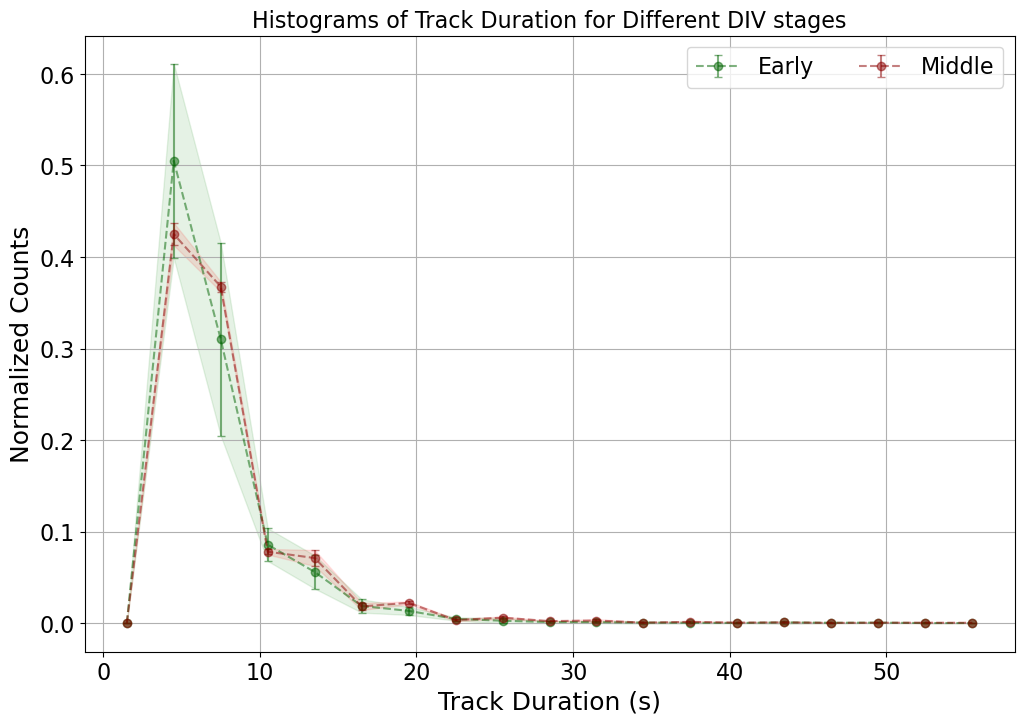

In [38]:
def plot_histograms_by_file_address(df_list, data_folder, save_name, track_duration_col='track_duration', file_address_col='file_address'):
    """
    Plot histograms of track durations for multiple datasets, showing shaded regions for each dataset.
    Saves the plot as an SVG file.

    Parameters:
    df_list : list of pandas DataFrames
        List containing DataFrames, each with track duration and file address columns.
    data_folder : str
        Path to the folder where the SVG file will be saved.
    save_name : str
        Base name for the saved SVG file (without extension).
    track_duration_col : str, default 'track_duration'
        The name of the column containing track duration values.
    file_address_col : str, default 'file_address'
        The name of the column containing file addresses.
    """

    # Define histogram bins and bin centers
    bins = np.arange(0, 60, 3)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    plt.figure(figsize=(12, 8))

    # List of labels for the datasets
    dataset_labels = ['Early', 'Middle']
    color_labels = ['darkgreen', 'darkred']
    error_color_labels = ['green', 'red']

    # Helper function to get entry counts per file
    def count_entries_by_filename(df, file_address_col):
        entry_counts = df.groupby(file_address_col).size().reset_index(name='entry_count')
        return entry_counts

    # Plot histograms for each DataFrame in the list
    for idx, df in enumerate(df_list):
        histograms = []
        weights = []

        # Get entry counts for the current DataFrame
        entry_counts_df = count_entries_by_filename(df, file_address_col)

        # Group data by 'file_address' and calculate histograms for each unique file
        for file_address, group_data in df.groupby(file_address_col):
            track_durations = group_data[track_duration_col]

            # Find the entry count for this file
            entry_count = entry_counts_df.loc[entry_counts_df[file_address_col] == file_address, 'entry_count'].values[0]

            # Compute histogram for the current file_address
            counts, _ = np.histogram(track_durations, bins=bins, density=False)
            normalized_counts = counts / counts.sum() if counts.sum() > 0 else counts
            histograms.append(normalized_counts)

            # Use the entry count as a weight for this file's histogram
            weights.append(entry_count)

        # Convert histograms to a numpy array for easier computation
        hist_array = np.array(histograms)
        weights = np.array(weights)

        # Calculate the weighted mean and weighted standard deviation
        mean_histogram = np.average(hist_array, axis=0, weights=weights)
        variance = np.average((hist_array - mean_histogram) ** 2, axis=0, weights=weights)
        std_deviation_at_bins = np.sqrt(variance)

        # Plot mean histogram with error bars (shaded region)
        plt.errorbar(bin_centers, mean_histogram, yerr=std_deviation_at_bins, 
                     fmt='--o', color=color_labels[idx], label=dataset_labels[idx], capsize=3, linewidth=1.5, alpha=0.5)

        # Shade the region between the mean ± std deviation for each dataset
        plt.fill_between(bin_centers, 
                         mean_histogram - std_deviation_at_bins, 
                         mean_histogram + std_deviation_at_bins, color=error_color_labels[idx], alpha=0.1)

    # Add labels, title, legend, and grid
    plt.xlabel('Track Duration (s)', fontsize=18)
    plt.ylabel('Normalized Counts', fontsize=18)
    plt.title('Histograms of Track Duration for Different DIV stages', fontsize=16)
    plt.legend(loc='upper right', fontsize=16, ncol=2)
    plt.grid(True)

    # Increase tick label font sizes
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.tick_params(axis='both', which='minor', labelsize=16)

    # Save the plot as SVG file
    save_path = os.path.join(data_folder, f"{save_name}_track_durations.svg")
    plt.savefig(save_path, format='svg', bbox_inches='tight')

    # Show the plot
    plt.show()

# Example usage (without the late stage):
plot_histograms_by_file_address([tp_trajectories_early_min3, tp_trajectories_middle_min3], 
                                     data_folder=data_folder, save_name='ridge')


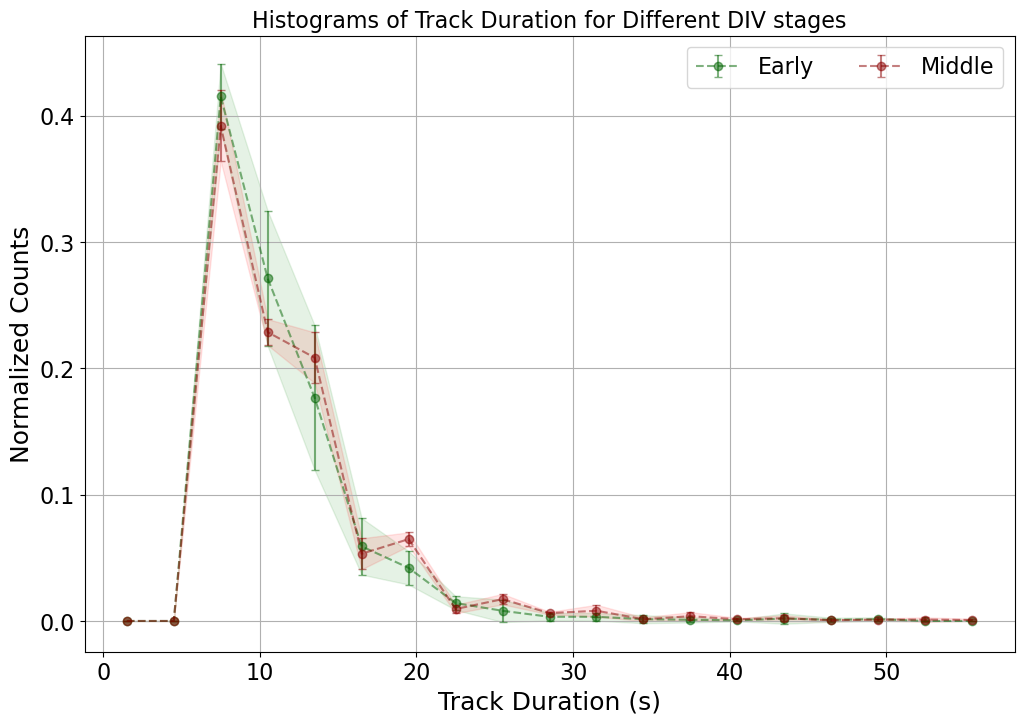

In [39]:
# Example usage (without the late stage):
plot_histograms_by_file_address([tp_trajectories_early_min5, tp_trajectories_middle_min5], 
                                     data_folder=data_folder, save_name='ridge')

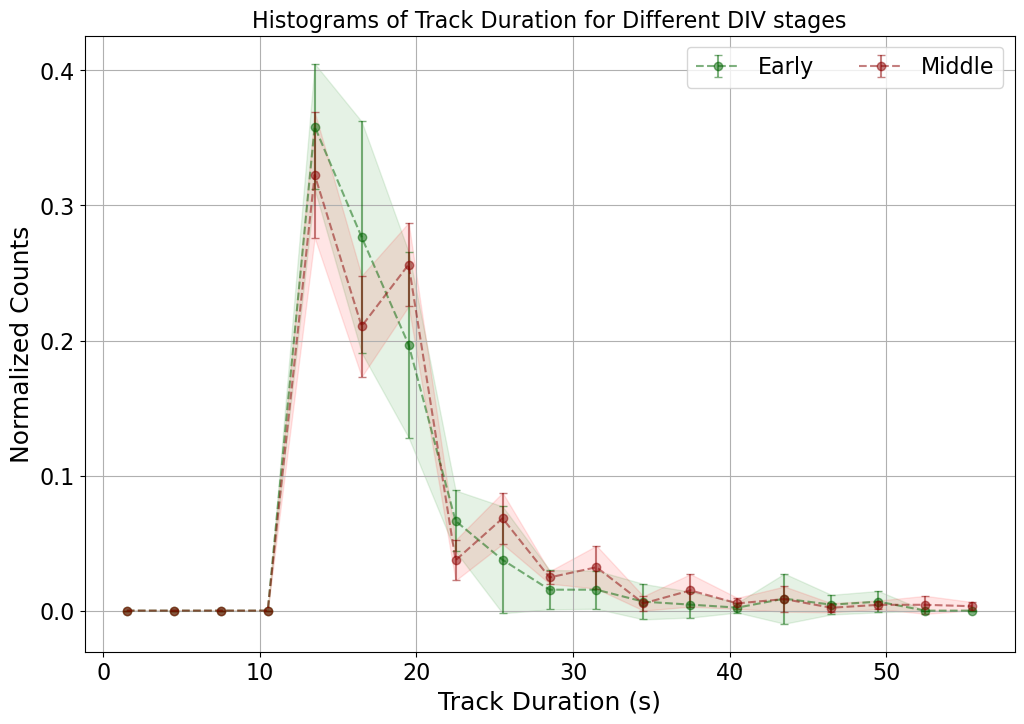

In [42]:
# Example usage (without the late stage):
plot_histograms_by_file_address([tp_trajectories_early_min8, tp_trajectories_middle_min8], 
                                     data_folder=data_folder, save_name='ridge')

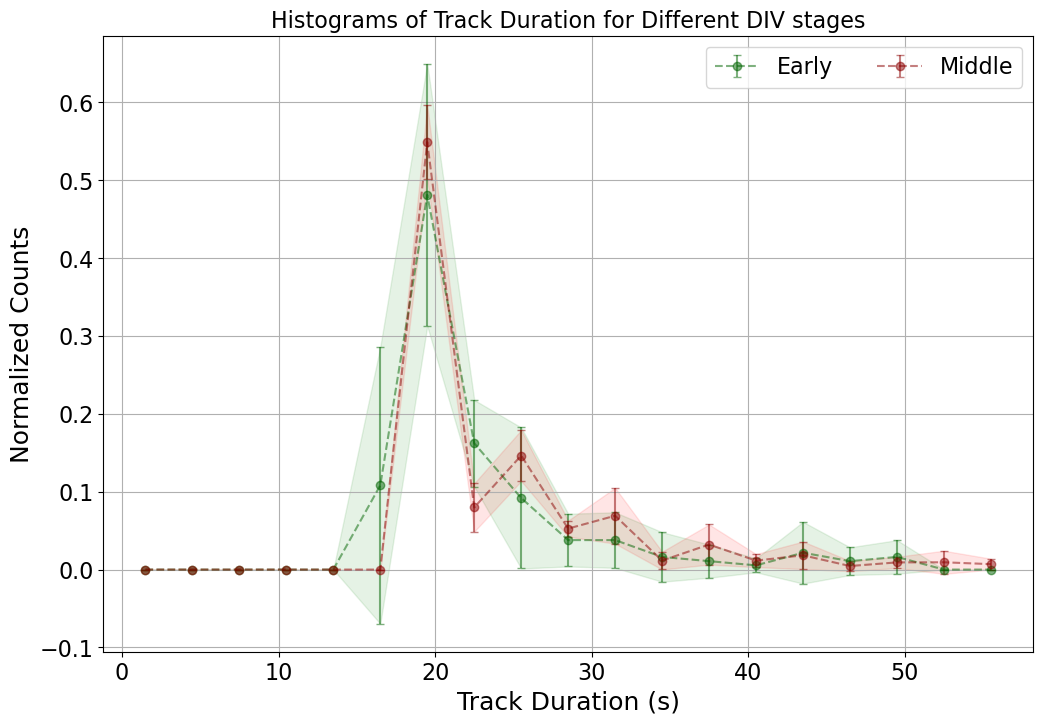

In [43]:
# Example usage (without the late stage):
plot_histograms_by_file_address([tp_trajectories_early_min10, tp_trajectories_middle_min10], 
                                     data_folder=data_folder, save_name='ridge')

In [10]:
# Filepath setup
min_frames_paths = {
    "min3": r'E:\Spandan\2D_Neurons_Paper\Ridges\minimum_3_frames',
    "min5": r'E:\Spandan\2D_Neurons_Paper\Ridges\minimum_5_frames',
    "min8": r'E:\Spandan\2D_Neurons_Paper\Ridges\minimum_8_frames',
    "min10": r'E:\Spandan\2D_Neurons_Paper\Ridges\minimum_10_frames'
}

# Dictionary to store dataframes
dataframes = {}

# Load dataframes
for key, path in min_frames_paths.items():
    dataframes[key] = {
        "early_stage": pd.read_csv(f"{path}\\early_stage.csv"),
        "middle_stage": pd.read_csv(f"{path}\\middle_stage.csv")
    }


In [70]:
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_histograms_by_file_address(df_list, labels, colors, data_folder, save_name, track_duration_col='track_duration', file_address_col='file_address'):
    """
    Plot histograms of track durations for multiple datasets, showing shaded regions for each dataset.
    Saves the plot as an SVG file.

    Parameters:
    df_list : list of pandas DataFrames
        List containing DataFrames, each with track duration and file address columns.
    labels : list of str
        List of labels for the datasets, in order of df_list.
    colors : list of str
        List of colors corresponding to each stage (lighter and darker shades of the same color).
    data_folder : str
        Path to the folder where the SVG file will be saved.
    save_name : str
        Base name for the saved SVG file (without extension).
    track_duration_col : str, default 'track_duration'
        The name of the column containing track duration values.
    file_address_col : str, default 'file_address'
        The name of the column containing file addresses.
    """

    # Define histogram bins and bin centers
    bins = np.arange(0, 60, 2)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    plt.figure(figsize=(12, 8))

    # Helper function to get entry counts per file
    def count_entries_by_filename(df, file_address_col):
        entry_counts = df.groupby(file_address_col).size().reset_index(name='entry_count')
        return entry_counts

    # Plot histograms for each DataFrame in the list
    for idx, df in enumerate(df_list):
        histograms = []
        weights = []

        # Get entry counts for the current DataFrame
        entry_counts_df = count_entries_by_filename(df, file_address_col)

        # Group data by 'file_address' and calculate histograms for each unique file
        for file_address, group_data in df.groupby(file_address_col):
            track_durations = group_data[track_duration_col]

            # Find the entry count for this file
            entry_count = entry_counts_df.loc[entry_counts_df[file_address_col] == file_address, 'entry_count'].values[0]

            # Compute histogram for the current file_address
            counts, _ = np.histogram(track_durations, bins=bins, density=False)
            normalized_counts = counts / counts.sum() if counts.sum() > 0 else counts
            histograms.append(normalized_counts)

            # Use the entry count as a weight for this file's histogram
            weights.append(entry_count)

        # Convert histograms to a numpy array for easier computation
        hist_array = np.array(histograms)
        weights = np.array(weights)

        # Calculate the weighted mean and weighted standard deviation
        mean_histogram = np.average(hist_array, axis=0, weights=weights)
        variance = np.average((hist_array - mean_histogram) ** 2, axis=0, weights=weights)
        std_deviation_at_bins = np.sqrt(variance)

        # Plot mean histogram with error bars (shaded region)
        plt.errorbar(bin_centers, mean_histogram, yerr=std_deviation_at_bins, 
                     fmt='o--', color=colors[idx], label=labels[idx], capsize=3, linewidth=1.5, alpha=0.5)

        # Shade the region between the mean ± std deviation for each dataset
        plt.fill_between(bin_centers, 
                         mean_histogram - std_deviation_at_bins, 
                         mean_histogram + std_deviation_at_bins, color=colors[idx], alpha=0.1)

    # Add labels, title, legend, and grid
    plt.xlabel('Track Duration (s)', fontsize=18)
    plt.ylabel('Normalized Counts', fontsize=18)
    plt.title('Histograms of Track Duration for Different DIV Stages', fontsize=16)
    plt.legend(loc='upper right', fontsize=12, ncol=2)
    plt.grid(True)

    # Increase tick label font sizes
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.tick_params(axis='both', which='minor', labelsize=14)

    # Save the plot as an SVG file
    save_path = os.path.join(data_folder, f"{save_name}_track_durations.svg")
    plt.savefig(save_path, format='svg', bbox_inches='tight')

    # Show the plot
    plt.show()



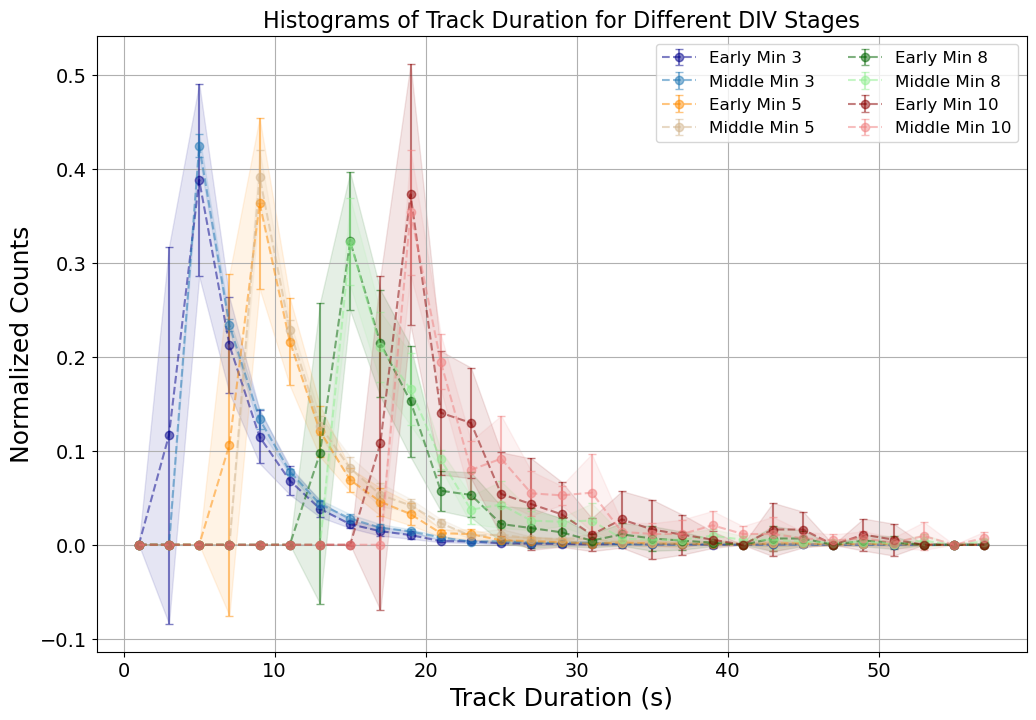

In [72]:
# List of DataFrames
df_list = [
    tp_trajectories_early_min3, tp_trajectories_middle_min3,
    tp_trajectories_early_min5, tp_trajectories_middle_min5,
    tp_trajectories_early_min8, tp_trajectories_middle_min8,
    tp_trajectories_early_min10, tp_trajectories_middle_min10
]

# Labels for each dataset
labels = [
    'Early Min 3', 'Middle Min 3',
    'Early Min 5', 'Middle Min 5',
    'Early Min 8', 'Middle Min 8',
    'Early Min 10', 'Middle Min 10'
]

# Lighter and darker shades of the same color for each stage
colors = [
    'darkblue',  # Blue (Early Min 3)
    '#1f77b4',  # Blue (Middle Min 3, lighter)
    'darkorange',  # Orange (Early Min 5)
    'tan',  # Orange (Middle Min 5, lighter)
    'darkgreen',  # Green (Early Min 8)
    'lightgreen',  # Green (Middle Min 8, lighter)
    'darkred',  # Red (Early Min 10)
    'lightcoral'   # Red (Middle Min 10, lighter)
]

# Folder to save the plot
data_folder = r'E:\Spandan\2D_Neurons_Paper\Ridges'
save_name = 'ridge_histograms'

# Call the function
plot_histograms_by_file_address(df_list, labels, colors, data_folder, save_name)
